___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project). You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

In [188]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [189]:
df=pd.read_csv("final_scout_dummy.csv")
df.head().T
X = df.drop("price", axis =1)
y = df["price"]
df.shape

(15914, 134)

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [191]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = MinMaxScaler()

In [192]:
scaler.fit(X_train)

MinMaxScaler()

In [193]:
X_train_scaled = scaler.transform(X_train)  #ortalamayı çıkarıp std ye bölen bir işlem yapıyor
X_train_scaled 

array([[3.78548896e-05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [6.24605678e-02, 3.33333333e-01, 3.33333333e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.63753943e-02, 6.66666667e-01, 3.33333333e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [5.36277603e-02, 0.00000000e+00, 6.66666667e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.01892744e-02, 0.00000000e+00, 3.33333333e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [7.09589905e-02, 3.33333333e-01, 1.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [194]:
X_test_scaled = scaler.transform(X_test)  #X-test ile x train arasındaki bilgi sızıntısını engellemiş olduk
X_test_scaled

array([[1.56485804e-01, 3.33333333e-01, 6.66666667e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.15457413e-04, 3.33333333e-01, 3.33333333e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.47003155e-02, 3.33333333e-01, 3.33333333e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [6.74353312e-02, 3.33333333e-01, 3.33333333e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.47003155e-02, 0.00000000e+00, 3.33333333e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.36593060e-02, 3.33333333e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [195]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [196]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [197]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [198]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [199]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear") #aralrında uçurum var overfit olduğunu tesbit ettim 
ls

,linear_train,linear_test
R2,0.891,0.887
mae,1714.979,1713.643
mse,6066103.682,5813016.816
rmse,2462.946,2411.020


In [200]:
from sklearn.metrics import SCORERS    #içerisindeki tüm metricleri vaeriyor
list(SCORERS.keys())

['explained_variance',
 'r2',
 'max_error',
 'neg_median_absolute_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_root_mean_squared_error',
 'neg_mean_poisson_deviance',
 'neg_mean_gamma_deviance',
 'accuracy',
 'top_k_accuracy',
 'roc_auc',
 'roc_auc_ovr',
 'roc_auc_ovo',
 'roc_auc_ovr_weighted',
 'roc_auc_ovo_weighted',
 'balanced_accuracy',
 'average_precision',
 'neg_log_loss',
 'neg_brier_score',
 'adjusted_rand_score',
 'rand_score',
 'homogeneity_score',
 'completeness_score',
 'v_measure_score',
 'mutual_info_score',
 'adjusted_mutual_info_score',
 'normalized_mutual_info_score',
 'fowlkes_mallows_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'jaccard',
 'jaccard_macro',
 'jaccard_m

In [201]:
from sklearn.model_selection import cross_validate, cross_val_score

In [202]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [203]:
pd.DataFrame(scores, index = range(1,6)) #crossvaliddte içerisinde bunu kaç defa yapıcaz eğer data önemli olursa crossvalidate
#çok önemlidir yüksek crossvalidate yapmak çok daha iyi sonuç verir 

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.146,0.002,0.889,-1758.365,-6046224.029,-2458.907
2,0.121,0.000,0.886,-1755.305,-6920668.411,-2630.716
3,0.125,0.000,0.884,-1740.234,-6134370.626,-2476.766
4,0.141,0.000,-1905330035251063554048.000,-6991100303460.820,-108894577079227014011651358720.000,-329991783351081.375
5,0.125,0.016,0.881,-1730.328,-6333311.061,-2516.607


In [204]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean() #scorların ortalaması hala uçurum devam ediyor 

test_r2                                    -381066007050212737024.000
test_neg_mean_absolute_error                       -1398220062089.010
test_neg_mean_squared_error        -21778915415845402802330271744.000
test_neg_root_mean_squared_error                  -65998356672232.875
dtype: float64

In [205]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [206]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,0.891,0.887
mae,1714.979,1713.643
mse,6066103.682,5813016.816
rmse,2462.946,2411.020


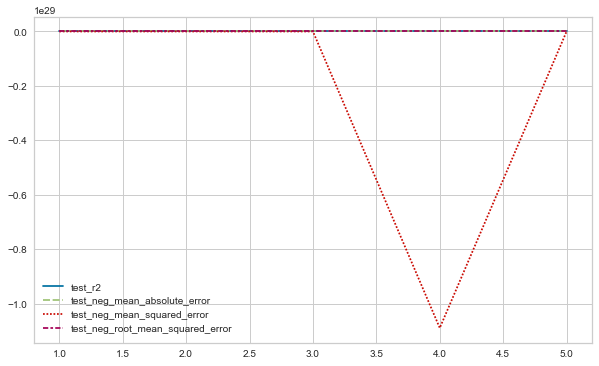

In [207]:
sns.lineplot(data = scores.iloc[:,2:]);

In [208]:
lm.coef_

array([-1.15202184e+04,  1.67604852e+03, -4.78222072e+03,  4.44413949e+02,
        2.40801737e+04, -1.77113137e+02, -1.23862965e+03, -1.55278502e+03,
        3.05825184e+03, -4.48844858e+03,  3.12826730e+02,  6.63026839e+01,
        7.31473958e+01,  2.35276462e+02, -2.99498214e+02,  2.70809875e+02,
       -1.22190705e+03, -1.37902997e+02,  1.08642101e+02,  1.59889507e+02,
        5.23901699e+02,  2.20653585e+03,  3.81175149e+02,  1.42738468e+02,
        6.84699065e+01, -5.10092156e+02,  1.51025499e+02,  1.80372898e+02,
       -3.75482798e+02,  4.03327377e+02,  5.26580815e+01,  3.14438415e+02,
       -3.29561534e+02,  5.75627143e+02,  5.31937088e+01,  1.08142742e+03,
        2.45419022e+02, -4.39593370e+02,  1.11064879e+02, -2.30424757e+02,
       -1.08723523e+01,  8.11067357e+02, -2.70644576e+02, -9.31036364e+01,
        7.02772677e+02,  3.97634623e+01, -6.08917452e+02, -9.26304808e+02,
       -5.55685671e+02,  2.13338508e+01,  8.76181077e+02,  3.92857968e+01,
        5.27521115e+01, -

In [209]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"]) #tahminlemeye en fazla etki eden feature budur
lm_df

,lm_coef
0,-11520.218
1,1676.049
2,-4782.221
3,444.414
4,24080.174
...,...
128,276.075
129,-1355.799
130,2311.733
131,-2568.452


## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

In [210]:
from sklearn.linear_model import Ridge

In [211]:
ridge_model = Ridge(alpha=1, random_state=42)

In [212]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [213]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [214]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.891,0.887
mae,1712.651,1711.996
mse,6070567.722,5813899.317
rmse,2463.852,2411.203


In [215]:
pd.concat([ls, rs], axis=1) #overfit azaltıldı

,linear_train,linear_test,ridge_train,ridge_test
R2,0.891,0.887,0.891,0.887
mae,1714.979,1713.643,1712.651,1711.996
mse,6066103.682,5813016.816,6070567.722,5813899.317
rmse,2462.946,2411.020,2463.852,2411.203


# cross_validation

In [216]:
model = Ridge(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [217]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.032,0.004,0.889,-1754.331,-6038090.859,-2457.253
2,0.031,0.000,0.886,-1751.225,-6906060.224,-2627.938
3,0.047,0.000,0.884,-1735.791,-6123770.246,-2474.625
4,0.062,0.000,0.890,-1736.797,-6297741.471,-2509.530
5,0.031,0.016,0.881,-1726.217,-6322692.661,-2514.497


In [218]:
scores = pd.DataFrame(scores, index = range(1, 6)) #scorlar birbirine yakın bir sorun yok
scores.iloc[:,2:].mean()

test_r2                                   0.886
test_neg_mean_absolute_error          -1740.872
test_neg_mean_squared_error        -6337671.092
test_neg_root_mean_squared_error      -2516.769
dtype: float64

In [219]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge") #rmse ödüllendirmede yapıyor

,ridge_train,ridge_test
R2,0.891,0.887
mae,1712.651,1711.996
mse,6070567.722,5813899.317
rmse,2463.852,2411.203


<AxesSubplot:>

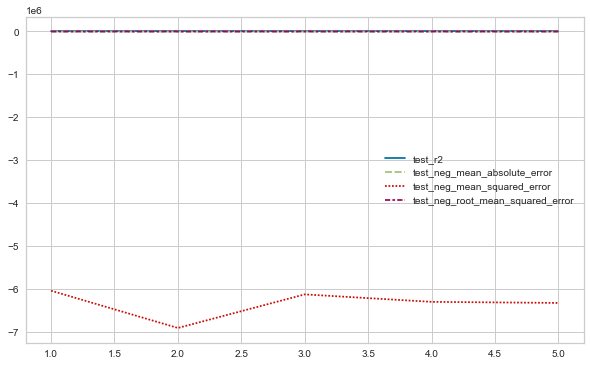

In [220]:
sns.lineplot(data = scores.iloc[:,2:])

In [221]:
ridge_model.coef_

array([-1.12683755e+04,  1.68473671e+03, -4.83536350e+03,  4.60727365e+02,
        2.27345396e+04, -1.83633480e+02, -6.40945678e+02, -1.40142769e+03,
        2.98362127e+03, -4.17157308e+03,  3.23847824e+02,  1.03375795e+02,
        7.56845373e+01,  2.36496218e+02, -2.91612136e+02,  2.62862655e+02,
       -5.85597002e+02, -1.29139568e+02,  1.04178993e+02,  1.56753712e+02,
        5.11494515e+02,  2.20710978e+03,  3.58021790e+02,  1.39723557e+02,
        6.86104755e+01, -4.56886420e+02,  1.49208661e+02,  1.83635267e+02,
       -3.77523688e+02,  4.02053868e+02,  5.44255416e+01,  3.21999546e+02,
       -3.27437046e+02,  5.87627706e+02,  5.61356651e+01,  1.07627027e+03,
        2.40266035e+02, -4.48706198e+02,  1.15675410e+02, -2.22342430e+02,
        3.46265107e+00,  8.20927982e+02, -2.65269624e+02, -7.32523499e+01,
        7.05359603e+02,  3.69587732e+01, -5.98394174e+02, -8.29443330e+02,
       -5.59031397e+02,  1.63529777e+01,  8.81113926e+02,  4.38391050e+01,
        5.01711116e+01, -

In [222]:
len(ridge_model.coef_)

133

# Cross_validation_For_best_alpha

In [223]:
from sklearn.linear_model import RidgeCV

In [224]:
alpha_space = np.linspace(0.01, 1, 100)   #en iyi alpha modelini seçmeye 
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [225]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [226]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [227]:
ridge_cv_model.alpha_  #en iyi alpha katsayısını bize döndürüyor Ridge(alpha=0.02)

0.87

In [228]:
ridge_cv_model.best_score_ #en düşük root mean square error score

-2516.74626895256

In [229]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [230]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,0.891,0.887
mae,1712.872,1712.161
mse,6069575.002,5813396.587
rmse,2463.651,2411.099


In [231]:
pd.concat([ls, rs, rcs], axis = 1) #alpha seçiminden sonra doğruluktaki değişim

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.891,0.887,0.891,0.887,0.891,0.887
mae,1714.979,1713.643,1712.651,1711.996,1712.872,1712.161
mse,6066103.682,5813016.816,6070567.722,5813899.317,6069575.002,5813396.587
rmse,2462.946,2411.020,2463.852,2411.203,2463.651,2411.099


In [232]:
ridge_cv_model.coef_

array([-1.13001130e+04,  1.68352808e+03, -4.82873107e+03,  4.58821178e+02,
        2.28989840e+04, -1.82817767e+02, -7.12868518e+02, -1.42011091e+03,
        2.99333863e+03, -4.21147137e+03,  3.22535719e+02,  9.94654376e+01,
        7.53562177e+01,  2.36311835e+02, -2.92459064e+02,  2.63877679e+02,
       -6.29400656e+02, -1.30262493e+02,  1.04734271e+02,  1.57105359e+02,
        5.13066078e+02,  2.20700584e+03,  3.60826059e+02,  1.40107273e+02,
        6.85450470e+01, -4.63055571e+02,  1.49425424e+02,  1.83242854e+02,
       -3.77322762e+02,  4.02137238e+02,  5.42134748e+01,  3.21073003e+02,
       -3.27771402e+02,  5.86174601e+02,  5.57637659e+01,  1.07690028e+03,
        2.40894465e+02, -4.47646775e+02,  1.15154508e+02, -2.23353816e+02,
        1.67652049e+00,  8.19688596e+02, -2.65912425e+02, -7.56677040e+01,
        7.05129958e+02,  3.73224214e+01, -5.99937386e+02, -8.40769739e+02,
       -5.58634596e+02,  1.69467208e+01,  8.80530542e+02,  4.32795053e+01,
        5.04764958e+01, -

## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [233]:
from sklearn.linear_model import Lasso, LassoCV

In [234]:
lasso_model = Lasso(alpha=1, random_state=42)  #modeli sıfırlıyoruz parametreler aynı olmalı alınan scorlar bizi yanıltmasın diye
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [235]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [236]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso") #model lasso ile underfit kalmış ridge ve lasso dada 
lss

,lasso_train,lasso_test
R2,0.891,0.888
mae,1715.261,1711.644
mse,6084712.267,5810496.070
rmse,2466.721,2410.497


In [237]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.891,0.887,0.891,0.887,0.891,0.887,0.891,0.888
mae,1714.979,1713.643,1712.651,1711.996,1712.872,1712.161,1715.261,1711.644
mse,6066103.682,5813016.816,6070567.722,5813899.317,6069575.002,5813396.587,6084712.267,5810496.070
rmse,2462.946,2411.020,2463.852,2411.203,2463.651,2411.099,2466.721,2410.497


# For Lasso CV with Default Alpha : 1

In [238]:
model = Lasso(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [239]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.234,0.000,0.889,-1754.505,-6020652.103,-2453.702
2,0.208,0.002,0.887,-1751.258,-6843769.375,-2616.060
3,0.213,0.000,0.885,-1731.537,-6106909.350,-2471.216
4,0.226,0.002,0.889,-1738.382,-6339690.095,-2517.874
5,0.230,0.004,0.882,-1727.839,-6270104.805,-2504.018


In [240]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                                   0.886
test_neg_mean_absolute_error          -1740.704
test_neg_mean_squared_error        -6316225.146
test_neg_root_mean_squared_error      -2512.574
dtype: float64

In [241]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

,lasso_train,lasso_test
R2,0.891,0.888
mae,1715.261,1711.644
mse,6084712.267,5810496.070
rmse,2466.721,2410.497


<AxesSubplot:>

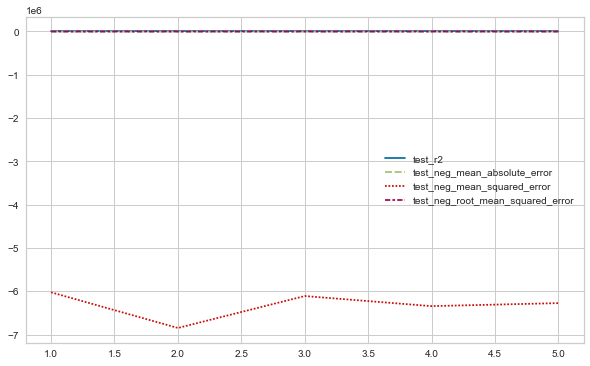

In [242]:
sns.lineplot(data = scores.iloc[:,2:])

In [243]:
lasso_model.coef_  #elimizde 2 feature kalmış gidip müşteriye sormalıyız minimum feature ile max score elde etmek istermisin 
#%10 luk bir kayıp senin işini görürmü

array([-1.12753653e+04,  1.64208893e+03, -4.83934026e+03,  3.82171316e+02,
        2.32777766e+04, -1.72879019e+02, -5.86984643e+02, -1.17572344e+03,
        2.22789570e+03, -3.44232459e+03,  2.95232175e+02, -0.00000000e+00,
        7.40465524e+01,  2.33444488e+02, -2.10335136e+02,  2.54929907e+02,
       -0.00000000e+00, -9.24039677e+01,  1.11585097e+02,  1.45143571e+02,
        5.03773033e+02,  2.20342907e+03,  3.54713190e+02,  1.40881807e+02,
        6.28764638e+01, -9.21764982e+01,  1.50184919e+02,  1.61957456e+02,
       -3.71589327e+02,  3.30696915e+02,  4.04409002e+01,  3.20045230e+02,
       -2.44084959e+02,  5.75802919e+02,  4.15623065e+01,  1.08435948e+03,
        2.30553254e+02, -4.19766948e+02,  8.64457708e+01, -1.96147557e+02,
        4.72526975e+00,  8.24382528e+02, -2.23893281e+02, -7.80505097e+01,
        6.26926156e+02,  4.04068224e+00, -1.52172337e+02, -0.00000000e+00,
       -5.43938288e+02,  1.38803531e+01,  8.72489859e+02,  1.83915960e+01,
        4.31165064e+01, -

In [244]:
len([i for i in lasso_model.coef_ if i==0])

13

# Choosing best alpha value with Cross-Validation

In [245]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=42) #max iter daha fazla alanı tarıyor

In [246]:
lasso_cv_model.fit(X_train_scaled, y_train) #alpha_space(0.01,1,100) ridge aynı alpha space seçip ona göre kıyaslıyoruz

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=100000, random_state=42)

In [247]:
lasso_cv_model.alpha_ 

1.0

In [248]:
alpha_space[::-1]

array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
       0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
       0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
       0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
       0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46,
       0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35,
       0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02,
       0.01])

In [249]:
y_pred = lasso_cv_model.predict(X_test_scaled)   #Lasso(alpha =0.01)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [250]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")#0.01 alpha değeri ile dahada scorların iyileştiğini görebiliyoruz
lcs

,lasso_cv_train,lasso_cv_test
R2,0.891,0.888
mae,1715.261,1711.644
mse,6084712.267,5810496.070
rmse,2466.721,2410.497


In [251]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1) #10 feature ile %98 lik bir modelmi istiyorsun diye sormalıyız

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.891,0.887,0.891,0.887,0.891,0.887,0.891,0.888,0.891,0.888
mae,1714.979,1713.643,1712.651,1711.996,1712.872,1712.161,1715.261,1711.644,1715.261,1711.644
mse,6066103.682,5813016.816,6070567.722,5813899.317,6069575.002,5813396.587,6084712.267,5810496.070,6084712.267,5810496.070
rmse,2462.946,2411.020,2463.852,2411.203,2463.651,2411.099,2466.721,2410.497,2466.721,2410.497


In [252]:
lasso_cv_model.coef_  #alpha katsayısının değişimi ile gayet iyi bir alana gelmiş oldu 

array([-1.12753653e+04,  1.64208893e+03, -4.83934026e+03,  3.82171316e+02,
        2.32777766e+04, -1.72879019e+02, -5.86984643e+02, -1.17572344e+03,
        2.22789570e+03, -3.44232459e+03,  2.95232175e+02, -0.00000000e+00,
        7.40465524e+01,  2.33444488e+02, -2.10335136e+02,  2.54929907e+02,
       -0.00000000e+00, -9.24039677e+01,  1.11585097e+02,  1.45143571e+02,
        5.03773033e+02,  2.20342907e+03,  3.54713190e+02,  1.40881807e+02,
        6.28764638e+01, -9.21764982e+01,  1.50184919e+02,  1.61957456e+02,
       -3.71589327e+02,  3.30696915e+02,  4.04409002e+01,  3.20045230e+02,
       -2.44084959e+02,  5.75802919e+02,  4.15623065e+01,  1.08435948e+03,
        2.30553254e+02, -4.19766948e+02,  8.64457708e+01, -1.96147557e+02,
        4.72526975e+00,  8.24382528e+02, -2.23893281e+02, -7.80505097e+01,
        6.26926156e+02,  4.04068224e+00, -1.52172337e+02, -0.00000000e+00,
       -5.43938288e+02,  1.38803531e+01,  8.72489859e+02,  1.83915960e+01,
        4.31165064e+01, -

In [253]:
len([i for i in lasso_cv_model.coef_ if i==0])

13

In [254]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.01"])

In [255]:
pd.concat([lm_df,  lcm_df], axis = 1)

,lm_coef,lasso_cv_coef_0.01
0,-11520.218,-11275.365
1,1676.049,1642.089
2,-4782.221,-4839.340
3,444.414,382.171
4,24080.174,23277.777
...,...,...
128,276.075,283.661
129,-1355.799,-1380.481
130,2311.733,2287.316
131,-2568.452,-2300.746


## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [256]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [257]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
elastic_model.fit(X_train_scaled, y_train)  

ElasticNet(alpha=1, random_state=42)

In [258]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [259]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.609,0.604
mae,3372.221,3290.290
mse,21791737.452,20469723.573
rmse,4668.162,4524.348


In [260]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,0.891,0.887,0.891,0.887,0.891,0.887,0.891,0.888,0.891,0.888,0.609,0.604
mae,1714.979,1713.643,1712.651,1711.996,1712.872,1712.161,1715.261,1711.644,1715.261,1711.644,3372.221,3290.290
mse,6066103.682,5813016.816,6070567.722,5813899.317,6069575.002,5813396.587,6084712.267,5810496.070,6084712.267,5810496.070,21791737.452,20469723.573
rmse,2462.946,2411.020,2463.852,2411.203,2463.651,2411.099,2466.721,2410.497,2466.721,2410.497,4668.162,4524.348


# For Elastic_net CV with Default alpha = 1 and l1_ratio=0.5

In [261]:
model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [262]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.610,-3421.320,-21217568.282,-4606.253
2,0.594,-3528.276,-24597214.895,-4959.558
3,0.623,-3244.224,-19967501.212,-4468.501
4,0.600,-3415.186,-22856654.283,-4780.863
5,0.609,-3284.008,-20806972.174,-4561.466


In [263]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                    0.607
test_neg_mean_absolute_error           -3378.603
test_neg_mean_squared_error        -21889182.169
test_neg_root_mean_squared_error       -4675.328
dtype: float64

In [264]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

,elastic_train,elastic_test
R2,0.609,0.604
mae,3372.221,3290.290
mse,21791737.452,20469723.573
rmse,4668.162,4524.348


In [265]:
elastic_model.coef_ #13 feature çıkarmış katsayıyı lasso ve ridgenin etkisi ile bazı yerlerde lasso ridge gibi davranmış  

array([-4.55758025e+02,  8.21999259e+02, -1.52834983e+03, -1.39297237e+02,
        5.19470701e+02, -1.35733025e+02,  2.25765500e+02,  3.82937382e+02,
        2.69179924e+02,  1.66489995e+02,  2.50374738e+01,  1.93240662e+01,
        4.70601871e+02,  7.89459327e+02, -0.00000000e+00,  5.09074740e+01,
       -7.12156414e-02,  3.02807201e+02, -2.68223756e+02,  3.75331482e+02,
        1.46686527e+02,  4.45136960e+02, -3.40848308e+01, -2.28282487e+02,
        2.96380615e+02,  0.00000000e+00,  2.04225821e+02,  3.73062455e+02,
        1.02584916e+02,  2.41341652e+02, -7.72775900e+00,  4.79023085e+02,
        2.51960517e+02,  6.01702393e+02,  3.87619314e+02,  3.17651384e+02,
        4.14855965e+02,  2.63750333e+02, -1.18963391e+02,  4.55947791e+02,
        4.33155695e+02,  2.91489861e+02, -2.31420159e+01,  3.76519592e+02,
        1.40194227e+02, -2.73530132e+01, -3.39216763e+00, -6.69134881e-01,
       -1.20118469e+02, -2.90372210e+02,  4.13340567e+02,  2.88218619e+01,
       -1.77476065e+02, -

In [266]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])

# Choosing best alpha and l1_ratio values with Cross-Validation

In [267]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 5, 
                                max_iter = 100000,random_state=42) #l1_ratio 0 ile 1 arasında değişiyor 

In [268]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=42)

In [269]:
elastic_cv_model.alpha_

1.0

In [270]:
elastic_cv_model.l1_ratio_

1.0

In [271]:
elastic_cv_model.mse_path_[5][-1].mean()

6344344.627931786

In [272]:
elastic_cv_model.mse_path_[5] 

array([[6020652.10262074, 6843769.37544174, 6106909.35002324,
        6339690.09456036, 6270104.80528968],
       [6020927.812171  , 6844315.16850913, 6106761.89234553,
        6339537.10785843, 6270592.27224192],
       [6021156.55774627, 6844847.24265943, 6106613.16804778,
        6339392.72566428, 6271107.65073582],
       [6021331.1244741 , 6845449.59426325, 6106578.73497059,
        6338970.71259612, 6271547.46617762],
       [6021537.34842305, 6846031.65048368, 6106433.67796561,
        6338565.15256355, 6272024.77551359],
       [6021739.92288609, 6846656.22743115, 6106380.72028544,
        6338183.72817518, 6272510.7009478 ],
       [6021926.10702122, 6847281.27789946, 6106273.68276255,
        6337804.91899388, 6272994.09365476],
       [6022106.55029624, 6847897.49919394, 6106187.63878581,
        6337420.29445794, 6273484.75869332],
       [6022300.42772661, 6848527.48014284, 6106103.69107292,
        6336938.84915975, 6273982.02478112],
       [6022495.64259455, 6849161.502

In [273]:
y_pred = elastic_cv_model.predict(X_test_scaled)  #ikisininde predictionunu aldık
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [274]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

,elastic_cv_train,elastic_cv_test
R2,0.891,0.888
mae,1715.261,1711.644
mse,6084712.267,5810496.070
rmse,2466.721,2410.497


In [275]:
pd.concat([ls,rs, rcs, lss, lcs, es, ecs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
R2,0.891,0.887,0.891,0.887,0.891,0.887,0.891,0.888,0.891,0.888,0.609,0.604,0.891,0.888
mae,1714.979,1713.643,1712.651,1711.996,1712.872,1712.161,1715.261,1711.644,1715.261,1711.644,3372.221,3290.290,1715.261,1711.644
mse,6066103.682,5813016.816,6070567.722,5813899.317,6069575.002,5813396.587,6084712.267,5810496.070,6084712.267,5810496.070,21791737.452,20469723.573,6084712.267,5810496.070
rmse,2462.946,2411.020,2463.852,2411.203,2463.651,2411.099,2466.721,2410.497,2466.721,2410.497,4668.162,4524.348,2466.721,2410.497


In [276]:
elastic_cv_model.coef_

array([-1.12753653e+04,  1.64208893e+03, -4.83934026e+03,  3.82171316e+02,
        2.32777766e+04, -1.72879019e+02, -5.86984643e+02, -1.17572344e+03,
        2.22789570e+03, -3.44232459e+03,  2.95232175e+02, -0.00000000e+00,
        7.40465524e+01,  2.33444488e+02, -2.10335136e+02,  2.54929907e+02,
       -0.00000000e+00, -9.24039677e+01,  1.11585097e+02,  1.45143571e+02,
        5.03773033e+02,  2.20342907e+03,  3.54713190e+02,  1.40881807e+02,
        6.28764638e+01, -9.21764982e+01,  1.50184919e+02,  1.61957456e+02,
       -3.71589327e+02,  3.30696915e+02,  4.04409002e+01,  3.20045230e+02,
       -2.44084959e+02,  5.75802919e+02,  4.15623065e+01,  1.08435948e+03,
        2.30553254e+02, -4.19766948e+02,  8.64457708e+01, -1.96147557e+02,
        4.72526975e+00,  8.24382528e+02, -2.23893281e+02, -7.80505097e+01,
        6.26926156e+02,  4.04068224e+00, -1.52172337e+02, -0.00000000e+00,
       -5.43938288e+02,  1.38803531e+01,  8.72489859e+02,  1.83915960e+01,
        4.31165064e+01, -

# Grid Search

In [277]:
from sklearn.model_selection import GridSearchCV #

In [278]:
elastic_model = ElasticNet(max_iter=10000, random_state=42) #l1_ratio ve alpha max_iter 

In [279]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],   #alpha değerinin bir sınırı yok ne kadar artarsa çalışma maaliyeti
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}   #artar

In [280]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =5, verbose =2)

In [281]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.3s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.4s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.4s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.4s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.3s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.3s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.3s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.3s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.3s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.3s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.3s
[CV] END ...........................alpha=0.01,

[CV] END ..............................alpha=0.2, l1_ratio=1; total time=   0.2s
[CV] END ..............................alpha=0.2, l1_ratio=1; total time=   0.2s
[CV] END ..............................alpha=0.2, l1_ratio=1; total time=   0.2s
[CV] END ..............................alpha=0.2, l1_ratio=1; total time=   0.2s
[CV] END ............................alpha=0.5, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.5; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=0.7, l1_ratio=0.99; total time=   0.1s
[CV] END ...........................alpha=0.7, l1_ratio=0.99; total time=   0.2s
[CV] END ..............................alpha=0.7, l1_ratio=1; total time=   0.1s
[CV] END ..............................alpha=0.7, l1_ratio=1; total time=   0.1s
[CV] END ..............................alpha=0.7, l1_ratio=1; total time=   0.1s
[CV] END ..............................alpha=0.7, l1_ratio=1; total time=   0.1s
[CV] END ..............................alpha=0.7, l1_ratio=1; total time=   0.1s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [282]:
grid_model.best_params_

{'alpha': 1, 'l1_ratio': 1}

In [283]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.443,0.024,0.004,0.006,0.010,0.100,"{'alpha': 0.01, 'l1_ratio': 0.1}",-2703.206,-2876.481,-2642.576,-2727.518,-2747.738,-2739.504,77.054,22
1,0.402,0.016,0.002,0.000,0.010,0.500,"{'alpha': 0.01, 'l1_ratio': 0.5}",-2618.102,-2787.135,-2583.421,-2649.949,-2669.299,-2661.581,69.222,17
2,0.400,0.023,0.004,0.006,0.010,0.700,"{'alpha': 0.01, 'l1_ratio': 0.7}",-2561.713,-2729.569,-2545.025,-2601.012,-2616.093,-2610.682,64.754,15
3,0.350,0.013,0.006,0.008,0.010,0.900,"{'alpha': 0.01, 'l1_ratio': 0.9}",-2487.654,-2656.105,-2494.982,-2538.753,-2543.775,-2544.254,60.287,12
4,0.345,0.007,0.000,0.000,0.010,0.950,"{'alpha': 0.01, 'l1_ratio': 0.95}",-2467.316,-2636.367,-2481.120,-2520.982,-2523.562,-2525.869,59.447,10
5,0.347,0.020,0.003,0.006,0.010,0.990,"{'alpha': 0.01, 'l1_ratio': 0.99}",-2457.200,-2627.888,-2474.556,-2509.375,-2514.427,-2516.689,59.561,6
6,0.366,0.012,0.000,0.000,0.010,1,"{'alpha': 0.01, 'l1_ratio': 1}",-2458.786,-2630.536,-2476.561,-2508.096,-2516.442,-2518.084,59.981,9
7,0.397,0.006,0.000,0.000,0.012,0.100,"{'alpha': 0.012, 'l1_ratio': 0.1}",-2734.789,-2910.130,-2665.034,-2757.363,-2776.495,-2768.762,80.110,25
8,0.363,0.005,0.000,0.000,0.012,0.500,"{'alpha': 0.012, 'l1_ratio': 0.5}",-2642.024,-2811.992,-2599.883,-2671.308,-2691.530,-2683.347,71.324,19
9,0.373,0.019,0.000,0.000,0.012,0.700,"{'alpha': 0.012, 'l1_ratio': 0.7}",-2580.113,-2748.183,-2557.503,-2616.778,-2633.600,-2627.235,66.123,16


In [284]:
grid_model.best_index_

48

In [285]:
grid_model.best_score_

-2512.5739264802205

# Using Best Hyper Parameters From GridSearch

In [286]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [287]:
train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

,GridSearch_train,GridSearch_test
R2,0.891,0.888
mae,1715.261,1711.644
mse,6084712.267,5810496.070
rmse,2466.721,2410.497


## 7. Visually Compare Models Performance In a Graph

# Feature importances with Ridge

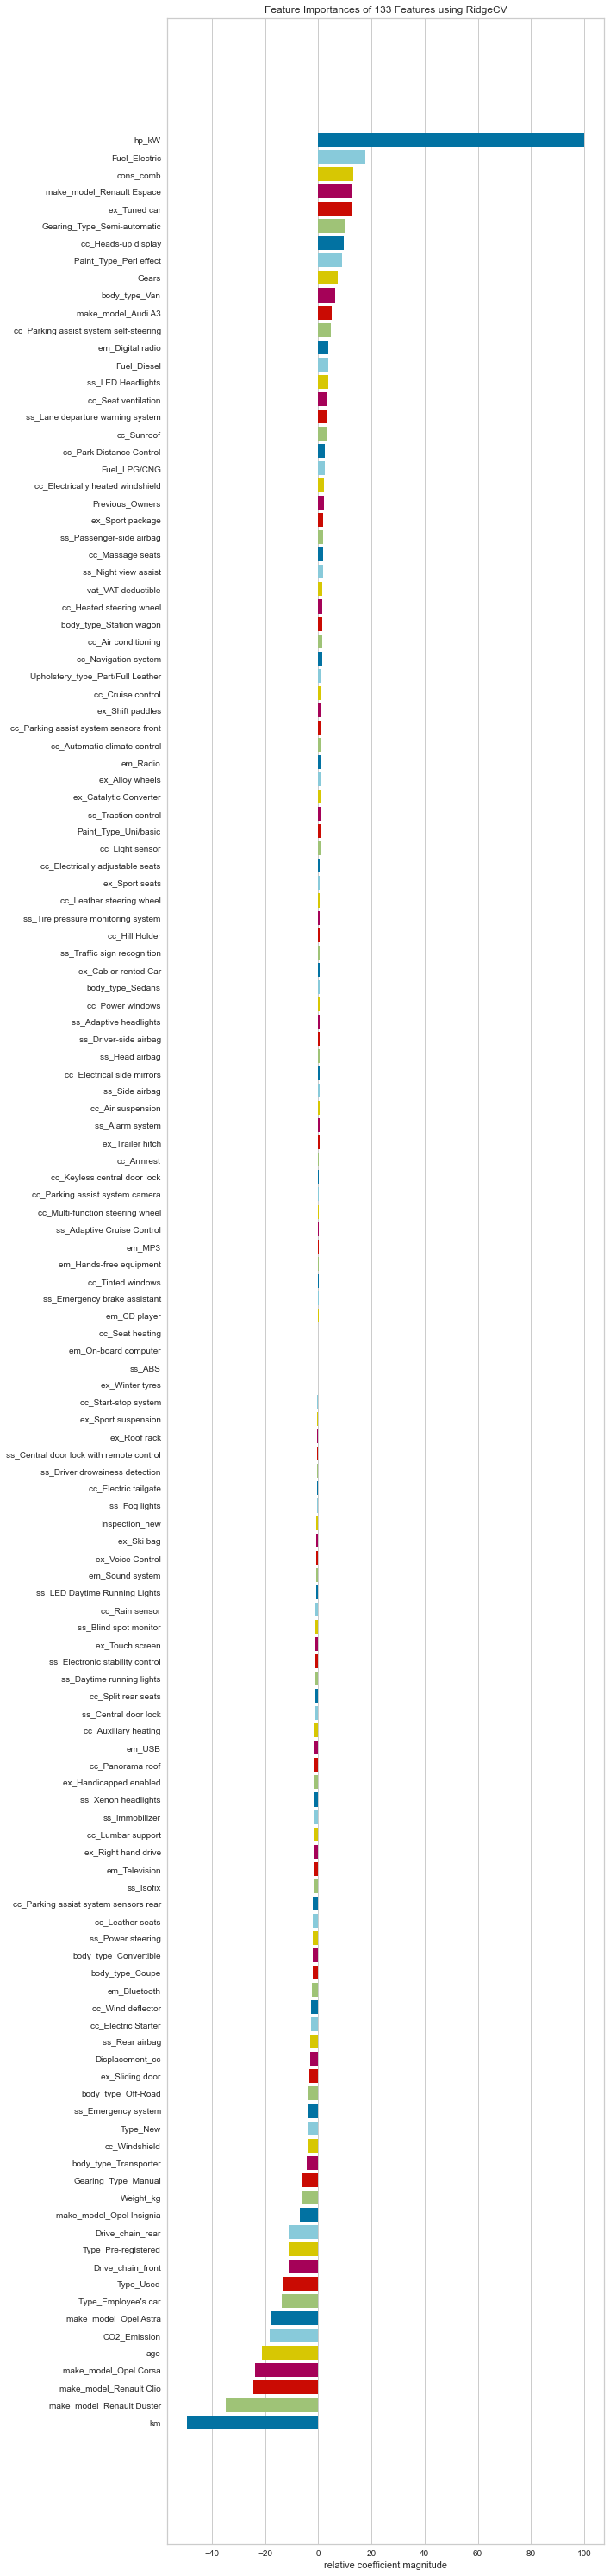

<AxesSubplot:title={'center':'Feature Importances of 133 Features using RidgeCV'}, xlabel='relative coefficient magnitude'>

In [288]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(ridge_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

# Feature importances with Lasso

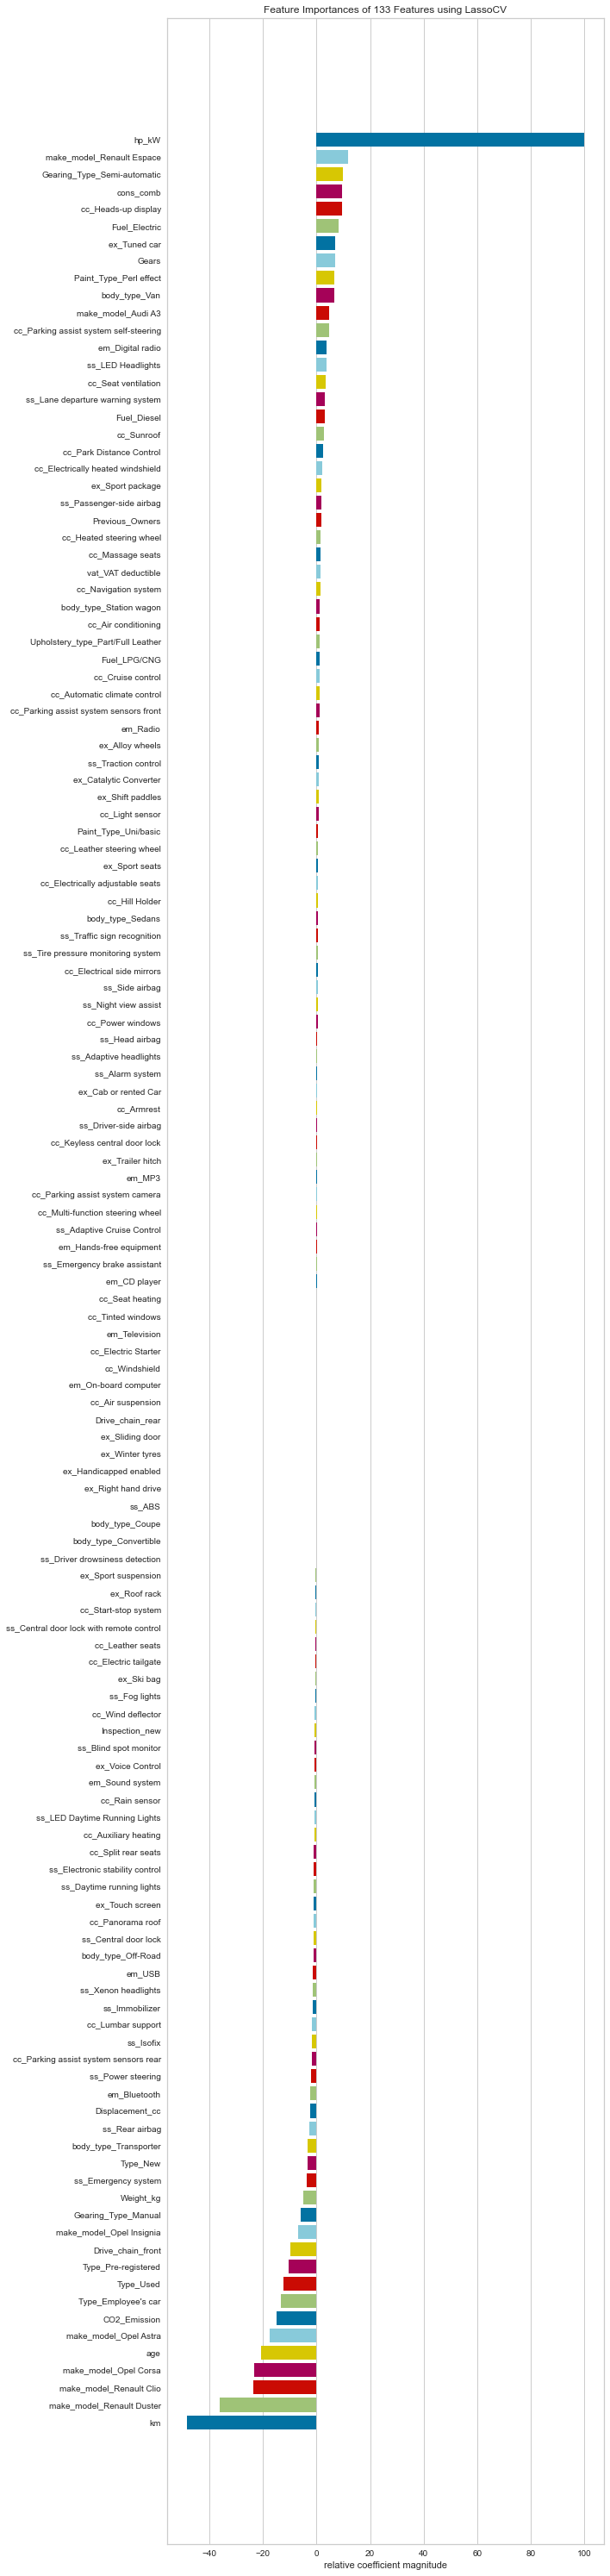

<AxesSubplot:title={'center':'Feature Importances of 133 Features using LassoCV'}, xlabel='relative coefficient magnitude'>

In [289]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___